# This notebook is used to analyse the DMV data

In [15]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank1D
from yellowbrick.features import Rank2D

import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score,accuracy_score

from imblearn.datasets import fetch_datasets
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier

from imblearn.metrics import geometric_mean_score

from sklearn.model_selection import TimeSeriesSplit

from yellowbrick.datasets import load_occupancy
from yellowbrick.target import ClassBalance

In [16]:
# Load the dataset
#The dataset will be uploaded soon
df_p = pd.read_excel (r'C:\Users\hp\OneDrive - UNSW\Honours student Sai\Vincent\Final_Data\DMV_Crash_Data_Bool.xlsx', skip_header = True)
print((df_p).shape)


(259, 39)


In [17]:
filtered_df = (df_p["vehicle type"], df_p["Number for Road Type"], df_p["Intersection"],
    df_p["Intersection Geometry"], df_p["Parking provision"], df_p["Vehicles Involved"], df_p["Mode"],
    df_p["Vehicle1 Status"], df_p["Vehicle2 Status"], df_p["Fault"], df_p["NO. for collision type"],
    df_p["InjuriesBool"], df_p["Vehicle1 Damage"], df_p["Vehicle2 Damage"], df_p["signal"])
df_p = pd.DataFrame(data = filtered_df)
print(type(df_p))
print(df_p.head())
df_p = df_p.transpose()
print(type(df_p))


<class 'pandas.core.frame.DataFrame'>
                       0    1    2    3    4    5    6    7    8    9    ...  \
vehicle type           2.0  3.0  2.0  3.0  3.0  3.0  2.0  3.0  3.0  2.0  ...   
Number for Road Type   2.0  1.0  1.0  1.0  4.0  1.0  1.0  2.0  4.0  1.0  ...   
Intersection           0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   
Intersection Geometry  2.0  2.0  3.0  3.0  0.0  3.0  3.0  3.0  2.0  2.0  ...   
Parking provision      0.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  ...   

                       249  250  251  252  253  254  255  256  257  258  
vehicle type           3.0  4.0  2.0  4.0  2.0  2.0  4.0  3.0  4.0  3.0  
Number for Road Type   2.0  1.0  1.0  1.0  1.0  3.0  1.0  2.0  1.0  1.0  
Intersection           0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  
Intersection Geometry  3.0  2.0  3.0  3.0  3.0  1.0  1.0  3.0  3.0  2.0  
Parking provision      1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  

[5 rows x 259 columns]
<class 'panda

In [18]:
#remove Na values

df_R = df_p.dropna(axis=0) #axis=0 
#Determine if rows or columns which contain missing values are removed.
#0, or ‘index’ : Drop rows which contain missing values.
print((df_R).shape)
print(df_R.head())

(200, 15)
   vehicle type  Number for Road Type  Intersection  Intersection Geometry  \
0           2.0                   2.0           0.0                    2.0   
1           3.0                   1.0           1.0                    2.0   
2           2.0                   1.0           1.0                    3.0   
3           3.0                   1.0           1.0                    3.0   
4           3.0                   4.0           1.0                    0.0   

   Parking provision  Vehicles Involved  Mode  Vehicle1 Status  \
0                0.0                2.0   0.0              0.0   
1                1.0                2.0   0.0              1.0   
2                1.0                2.0   1.0              1.0   
3                1.0                2.0   1.0              0.0   
4                1.0                2.0   1.0              0.0   

   Vehicle2 Status  Fault  NO. for collision type  InjuriesBool  \
0              1.0    0.0                     2.0        

In [19]:
X_df = (df_R["vehicle type"], df_R["Number for Road Type"], df_R["Intersection"],
    df_R["Intersection Geometry"], df_R["Parking provision"], df_R["Vehicles Involved"], df_R["Mode"],
    df_R["Vehicle1 Status"], df_R["Vehicle2 Status"], df_R["Fault"], df_R["NO. for collision type"],
    df_R["Vehicle1 Damage"], df_R["Vehicle2 Damage"], df_R["signal"])
print(type(X_df))
print(len(X_df))
X_np= np.asarray(X_df)
print(type(X_np))
print((X_np).shape)
X_np= np.transpose(X_df)
print(type(X_np))
print((X_np).shape)

<class 'tuple'>
14
<class 'numpy.ndarray'>
(14, 200)
<class 'numpy.ndarray'>
(200, 14)


In [20]:
#Please enter the dependent variables
Y_df = (df_R["InjuriesBool"])
print(type(Y_df))
print(len(Y_df))
Y_np= np.asarray(Y_df)
print(type(Y_np))
print((Y_np).shape)
Y_np= np.transpose(Y_df)
print(type(Y_np))
print((Y_np).shape)

<class 'pandas.core.series.Series'>
200
<class 'numpy.ndarray'>
(200,)
<class 'pandas.core.series.Series'>
(200,)


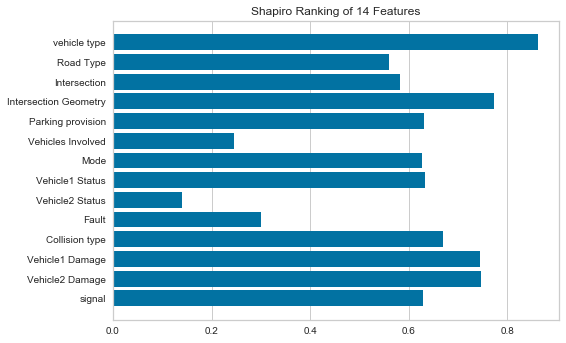

In [21]:
# Create a list of the features to plot
my_features = ["vehicle type","Road Type","Intersection", "Intersection Geometry", "Parking provision", "Vehicles Involved", "Mode",
    "Vehicle1 Status", "Vehicle2 Status", "Fault", "Collision type","Vehicle1 Damage", "Vehicle2 Damage","signal"]

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(algorithm='shapiro', features = my_features, sort=True)

visualizer.fit(X_np, Y_np)           # Fit the data to the visualizer
visualizer.transform(X_np)        # Transform the data
visualizer.show() 

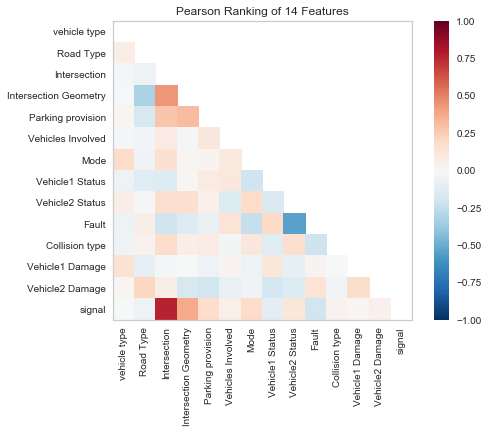

In [22]:
# Instantiate the visualizer with the covariance ranking algorithm
visualizer = Rank2D(algorithm='pearson', features = my_features, sort=True)
#visualizer = Rank2D(algorithm='covariance', features = my_features, sort=True)

visualizer.fit(X_np, Y_np)           # Fit the data to the visualizer
visualizer.transform(X_np)        # Transform the data
visualizer.show()              # Finalize and render the figure

In [23]:
#Splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_np, Y_np, 
                                                    test_size=0.20, 
                                                    random_state=42, stratify = Y_np)

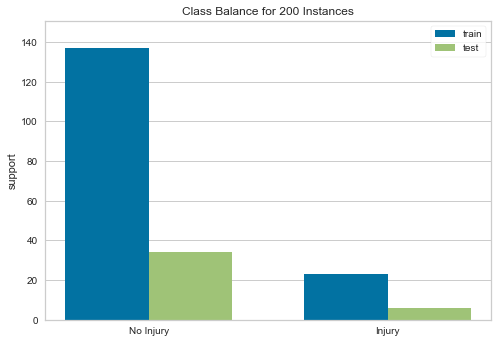

In [24]:
# Instantiate the visualizer
visualizer = ClassBalance(labels=["No Injury", "Injury"])

visualizer.fit(y_train, y_test)        # Fit the data to the visualizer
visualizer.show()                      # Finalize and render the figure